# COS Expenditure Analysis

In [1]:
import pandas as pd

raw_df = pd.read_csv("cos_expenditure.csv")
raw_df

,Doc. No. (GL View),Posting date,Item Text,G/L Account,Unnamed: 4,Fund,Cost Center,Unnamed: 7,WBS Element,Unnamed: 9,Internal Order,Unnamed: 11,Funds\nReceived,Fund Consumed
0,2600096964,03.11.2020,ILLAROO RD COS PAYMENT,522874,General Staff Traing,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,"(6,720.00)"
1,2600096967,04.11.2020,CAMBEWARRA PS COS PAYMENT,522874,General Staff Traing,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,"(4,000.00)"
2,2600096969,03.11.2020,KANGAROO VALLEY COS PAYMENT,522874,General Staff Traing,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,(960.00)
3,2600096973,03.11.2020,NORTH NOWRA PS COS PAYMENT,522874,General Staff Traing,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,"(4,160.00)"
4,2600096975,11.11.2020,BOMADERRY PS COS PAYMENT,522874,General Staff Traing,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,"(7,040.00)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,6500039712,01.09.2020,#,500006,Teaching Salaries,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,366.84
234,6500039712,01.09.2020,#,500044,Leave Load- Sch bsd,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,4.92
235,6500039712,01.09.2020,#,503337,Super Defined Contbn,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,39.90
236,6500039712,01.09.2020,#,504449,Payroll Tax,6100,1000/68448101,8448-ED DELIVERY,#,#,2001018971,NORTH SHOALHAVEN COS PROJECT,NaN,19.98


In [2]:
# Remove unwanted cols
df = raw_df.drop(columns=["G/L Account", "Fund", "Unnamed: 7", "WBS Element", "Unnamed: 9", "Internal Order", "Unnamed: 11"])
df = df.rename(columns={"Doc. No. (GL View)": "id", "Posting date": "date", "Item Text": "item", "Unnamed: 4": "category", "Cost Center": "code", "Funds\nReceived": "in", "Fund Consumed": "out"})
df

,id,date,item,category,code,in,out
0,2600096964,03.11.2020,ILLAROO RD COS PAYMENT,General Staff Traing,1000/68448101,NaN,"(6,720.00)"
1,2600096967,04.11.2020,CAMBEWARRA PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,"(4,000.00)"
2,2600096969,03.11.2020,KANGAROO VALLEY COS PAYMENT,General Staff Traing,1000/68448101,NaN,(960.00)
3,2600096973,03.11.2020,NORTH NOWRA PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,"(4,160.00)"
4,2600096975,11.11.2020,BOMADERRY PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,"(7,040.00)"
...,...,...,...,...,...,...,...
233,6500039712,01.09.2020,#,Teaching Salaries,1000/68448101,NaN,366.84
234,6500039712,01.09.2020,#,Leave Load- Sch bsd,1000/68448101,NaN,4.92
235,6500039712,01.09.2020,#,Super Defined Contbn,1000/68448101,NaN,39.90
236,6500039712,01.09.2020,#,Payroll Tax,1000/68448101,NaN,19.98


In [3]:
# nothin in the "in" column so move negative "out" values to "in"
print(df[df["in"] > 0].value_counts())

def formatter(x):
    if x[0] == "(" and x[-1] == ")":
        return f"-{x[1:-2].replace(',', '')}"
    return x

df["out"] = pd.to_numeric(df["out"].apply(formatter), errors="coerce")
df

Series([], dtype: int64)


,id,date,item,category,code,in,out
0,2600096964,03.11.2020,ILLAROO RD COS PAYMENT,General Staff Traing,1000/68448101,NaN,-6720.00
1,2600096967,04.11.2020,CAMBEWARRA PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,-4000.00
2,2600096969,03.11.2020,KANGAROO VALLEY COS PAYMENT,General Staff Traing,1000/68448101,NaN,-960.00
3,2600096973,03.11.2020,NORTH NOWRA PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,-4160.00
4,2600096975,11.11.2020,BOMADERRY PS COS PAYMENT,General Staff Traing,1000/68448101,NaN,-7040.00
...,...,...,...,...,...,...,...
233,6500039712,01.09.2020,#,Teaching Salaries,1000/68448101,NaN,366.84
234,6500039712,01.09.2020,#,Leave Load- Sch bsd,1000/68448101,NaN,4.92
235,6500039712,01.09.2020,#,Super Defined Contbn,1000/68448101,NaN,39.90
236,6500039712,01.09.2020,#,Payroll Tax,1000/68448101,NaN,19.98


In [4]:
import numpy as np
df["in"] = df[df["out"] < 0]["out"].abs()
df["out"] = df["out"].apply(lambda n: n if n > 0 else np.nan)
#df["id"].value_counts()
df[df["item"] == "KERRY WILLIAMS INV-2 2.11.2020"]

,id,date,item,category,code,in,out
8,5303961060,03.11.2020,KERRY WILLIAMS INV-2 2.11.2020,General Staff Traing,1000/68448101,NaN,NaN


In [5]:
sum_df = df.groupby("id").sum()
sum_df

,in,out
id,,
2600096964,6720.0,0.00
2600096967,4000.0,0.00
2600096969,960.0,0.00
2600096973,4160.0,0.00
2600096975,7040.0,0.00
2600097324,1920.0,0.00
2600097326,2720.0,0.00
3200174138,0.0,114.54
5303961060,0.0,0.00


In [6]:
# add dates back in
def id_date(id):
    return df[df["id"] == id]["date"].iloc[0]

sum_df["date"] = pd.to_datetime(sum_df.index.map(id_date), format="%d.%m.%Y")
sum_df.sort_values(by=["date"], inplace=True)
sum_df

,in,out,date
id,,,
6500026317,0.0,584.94,2020-02-01
6400093727,0.0,541.50,2020-02-06
6400095370,0.0,1083.00,2020-02-20
6400094403,0.0,520.89,2020-02-20
6500026634,584.7,0.00,2020-03-01
6400097597,0.0,269.37,2020-03-05
6400097592,0.0,1083.00,2020-03-05
6400096782,0.0,520.89,2020-03-05
6400103212,0.0,269.40,2020-03-19


In [7]:
# add some type of category based on mapping id ranges (?) and maybe even specific ids if known


def id_category(id):
    if id < 3000000000:
        return "INCOME"
    if id < 4000000000:
        return "MEETING"
    if id < 5000000000:
        return "UNKNOWN"
    if id < 6000000000:
        return "SUPPLIER"
    return "PEOPLE"

sum_df["cost_centre"] = sum_df.index.map(id_category)
sum_df

,in,out,date,cost_centre
id,,,,
6500026317,0.0,584.94,2020-02-01,PEOPLE
6400093727,0.0,541.50,2020-02-06,PEOPLE
6400095370,0.0,1083.00,2020-02-20,PEOPLE
6400094403,0.0,520.89,2020-02-20,PEOPLE
6500026634,584.7,0.00,2020-03-01,PEOPLE
6400097597,0.0,269.37,2020-03-05,PEOPLE
6400097592,0.0,1083.00,2020-03-05,PEOPLE
6400096782,0.0,520.89,2020-03-05,PEOPLE
6400103212,0.0,269.40,2020-03-19,PEOPLE


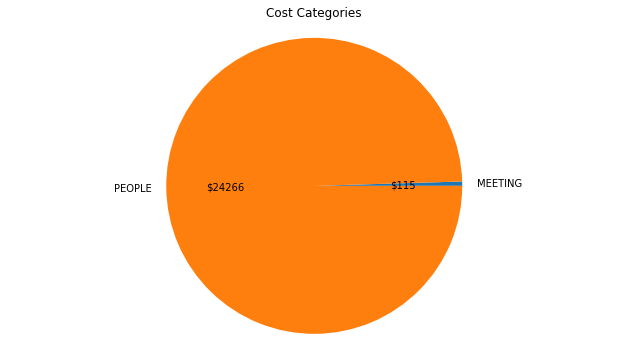

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plotdf = sum_df[sum_df["out"] > 0].groupby("cost_centre").sum()
values = plotdf["out"]
labels = plotdf.index
amount_sum = plotdf["out"].sum()

def dollar_value(val):
    return f"${int(np.round(val/100*amount_sum))}"

fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(values, labels=plotdf.index, autopct=dollar_value)
ax1.axis('equal')
plt.title('Cost Categories')
plt.show()